In [2]:
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [3]:
# Carregar os dados
iris = load_iris()
X, y = iris.data, iris.target

In [4]:
# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
valores_k=[3,5,7,9,11]
metrica_distancias = ['euclidean', 'manhattan']
resultado={}

In [10]:
# Treina o modelo
for metrica in metrica_distancias:
    acuracias=[]
    for k in valores_k:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metrica)
        knn.fit(X_train, y_train)
        # Testa o modelo
        y_pred = knn.predict(X_test)
        # Analisa as métricas
        acuracia=accuracy_score(y_test, y_pred)
        acuracias.append(acuracia) 
    resultado[metrica]=acuracias
resultado

{'euclidean': [1.0, 1.0, 0.9666666666666667, 1.0, 1.0],
 'manhattan': [1.0, 1.0, 1.0, 0.9666666666666667, 1.0]}

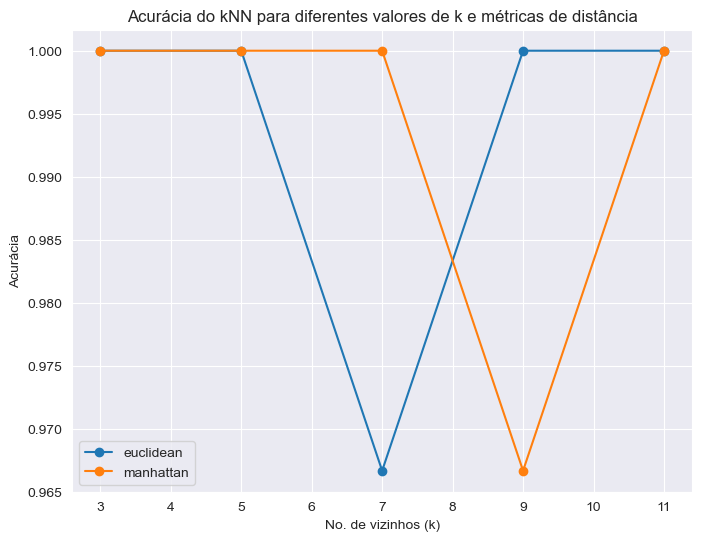

In [12]:
# Plotando o gráfico
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
for metrica, acuracia in resultado.items():
    plt.plot(valores_k, acuracia, label=metrica, marker='o')
plt.xlabel('No. de vizinhos (k)')
plt.ylabel('Acurácia')
plt.title('Acurácia do kNN para diferentes valores de k e métricas de distância')
plt.legend()
plt.grid(True)
plt.show()